# Import libraries

In [ ]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
sns.set_context("poster")

warnings.filterwarnings("ignore")

# Read Data

In [ ]:
# Membaca dataset dan melihat 5 baris pertama dari dataframe

df = pd.read_csv("/content/heart.csv")
df.head().style.set_properties(**{"background-color": "#FFB90F","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [ ]:
# Memeriksa jumlah baris dan kolom
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Memeriksa persentase null values

print("*****Percentage of Null Values*****")
print(round(df.isnull().sum() * 100/df.shape[0]))

Number of Rows: 303
Number of Columns: 14
*****Percentage of Null Values*****
age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64


In [ ]:
# Statistik Deskriptif dari kolom numerik dan persentil untuk menemukan potensi outlier.

df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98,0.99]).style.set_properties(**{"background-color": "#FFB90F","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000
95%,68.000000,1.000000,3.000000,160.000000,326.900000,1.000000,1.000000,181.900000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000
98%,70.000000,1.000000,3.000000,177.840000,353.960000,1.000000,1.000000,186.960000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


# EDA

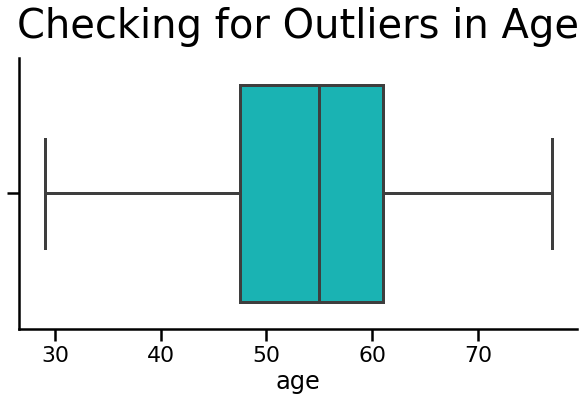

In [ ]:
# Visualizing "age"

plt.figure(figsize=[10,5])
sns.boxplot(df["age"], color="#00CDCD")
plt.title("Checking for Outliers in Age", size=40, pad=20)
sns.despine()
plt.show()

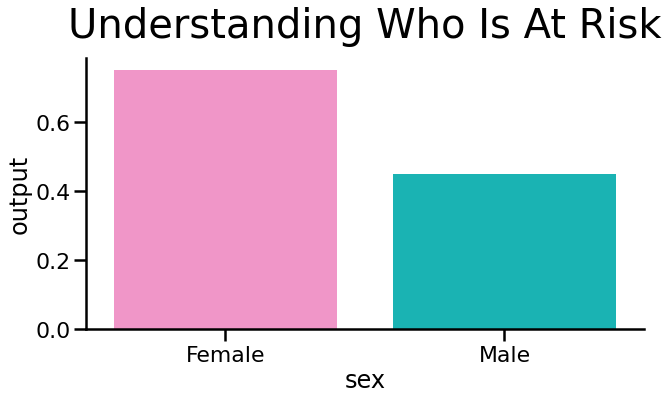

In [ ]:
# Visualizing "sex" assuming 0=Female and 1=Male

plt.figure(figsize=[10,5])
sns.barplot(x = df["sex"], y = df["output"], palette=['#FF87CA','#00CDCD'], ci=0)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.title("Understanding Who Is At Risk", size=40, pad=20)
sns.despine()
plt.show()

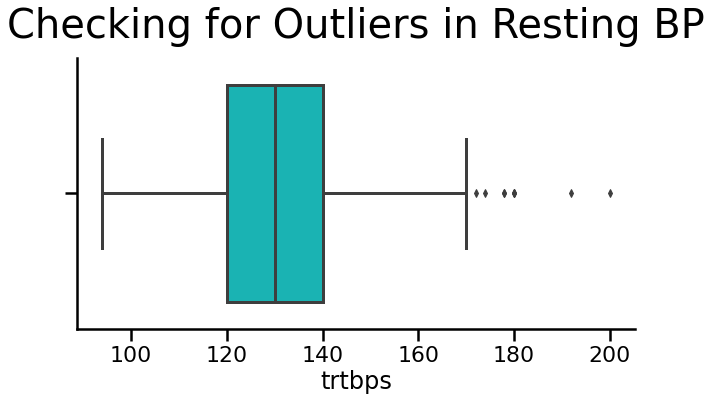

In [ ]:
# Visualizing "trtbps"

plt.figure(figsize=[10,5])
sns.boxplot(df["trtbps"], color="#00CDCD")
plt.title("Checking for Outliers in Resting BP", size=40, pad=20)
sns.despine()
plt.show()

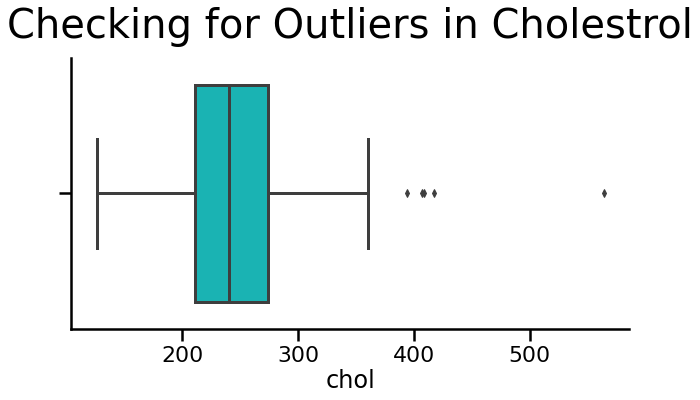

In [ ]:
# Visualizing "chol"

plt.figure(figsize=[10,5])
sns.boxplot(df["chol"], color="#00CDCD")
plt.title("Checking for Outliers in Cholestrol", size=40, pad=20)
sns.despine()
plt.show()

In [ ]:
# Menghapus 1 persentil teratas.

Q3 = df["chol"].quantile(0.99)
df = df[df["chol"] <= Q3]

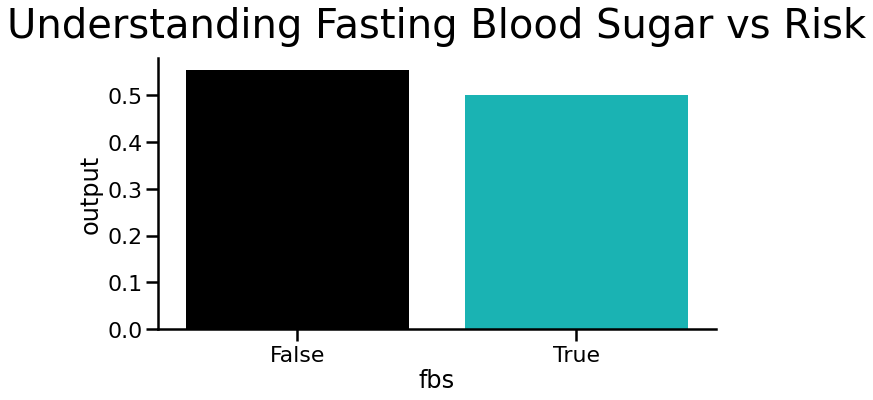

In [ ]:
# Visualizing "fbs"

plt.figure(figsize=[10,5])
sns.barplot(x = df["fbs"], y = df["output"], palette=['black','#00CDCD'], ci=0)
plt.xticks(ticks=[0,1], labels=['False','True'])
plt.title("Understanding Fasting Blood Sugar vs Risk", size=40, pad=20)
sns.despine()
plt.show()

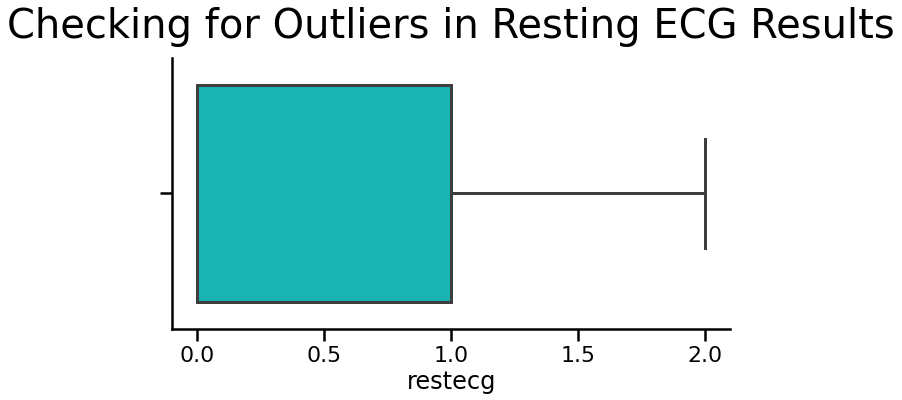

In [ ]:
# Visualizing "restecg"

plt.figure(figsize=[10,5])
sns.boxplot(df["restecg"], color="#00CDCD")
plt.title("Checking for Outliers in Resting ECG Results", size=40, pad=20)
sns.despine()
plt.show()

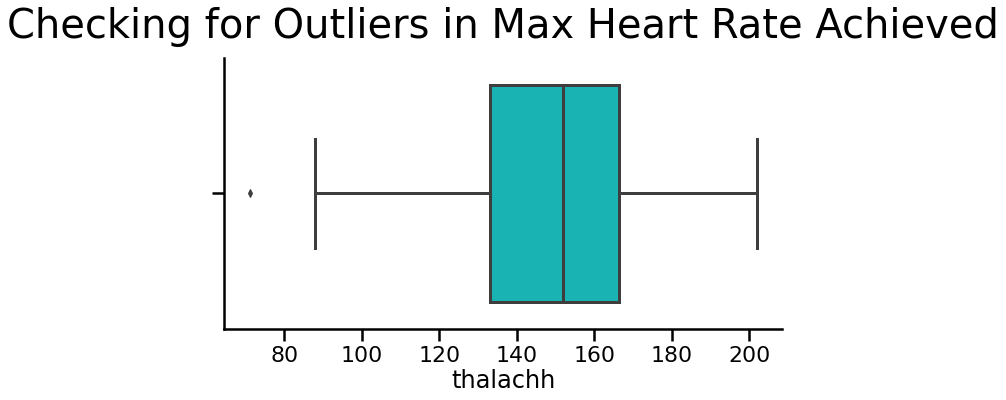

In [ ]:
# Visualizing "thalachh"

plt.figure(figsize=[10,5])
sns.boxplot(df["thalachh"], color="#00CDCD")
plt.title("Checking for Outliers in Max Heart Rate Achieved", size=40, pad=20)
sns.despine()
plt.show()

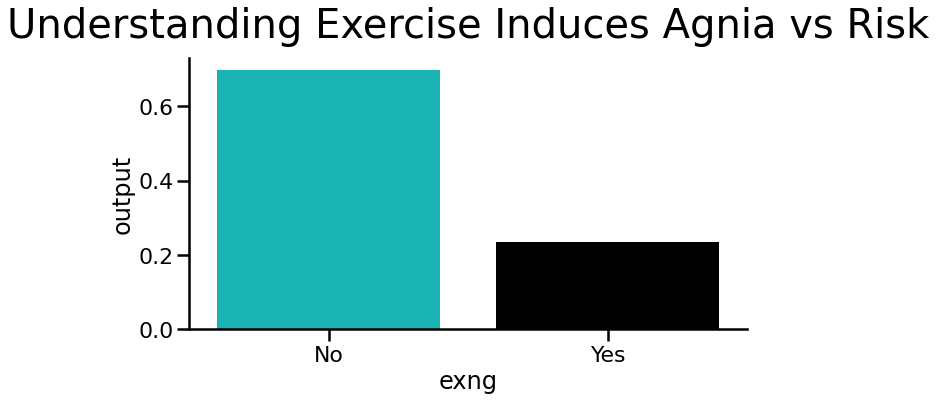

In [ ]:
# Visualizing "exng"

plt.figure(figsize=[10,5])
sns.barplot(x = df["exng"], y = df["output"], palette=['#00CDCD','black'], ci=0)
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.title("Understanding Exercise Induces Agnia vs Risk", size=40, pad=20)
sns.despine()
plt.show()

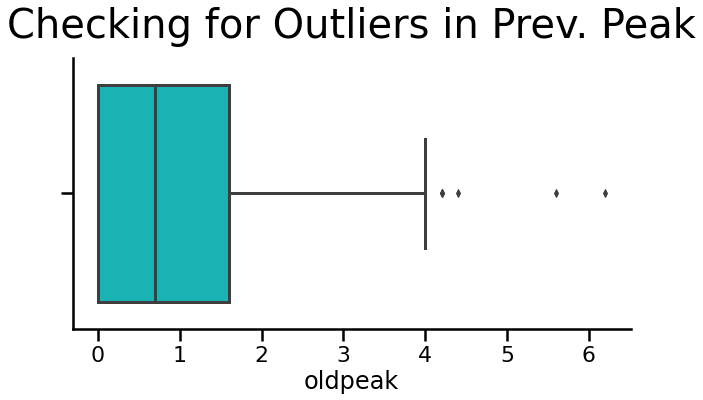

In [ ]:
# Visualizing "oldpeak"

plt.figure(figsize=[10,5])
sns.boxplot(df["oldpeak"], color="#00CDCD")
plt.title("Checking for Outliers in Prev. Peak", size=40, pad=20)
sns.despine()
plt.show()

In [ ]:
# Menghapus 1 persentil teratas.

Q3 = df["oldpeak"].quantile(0.99)
df = df[df["oldpeak"] <= Q3]

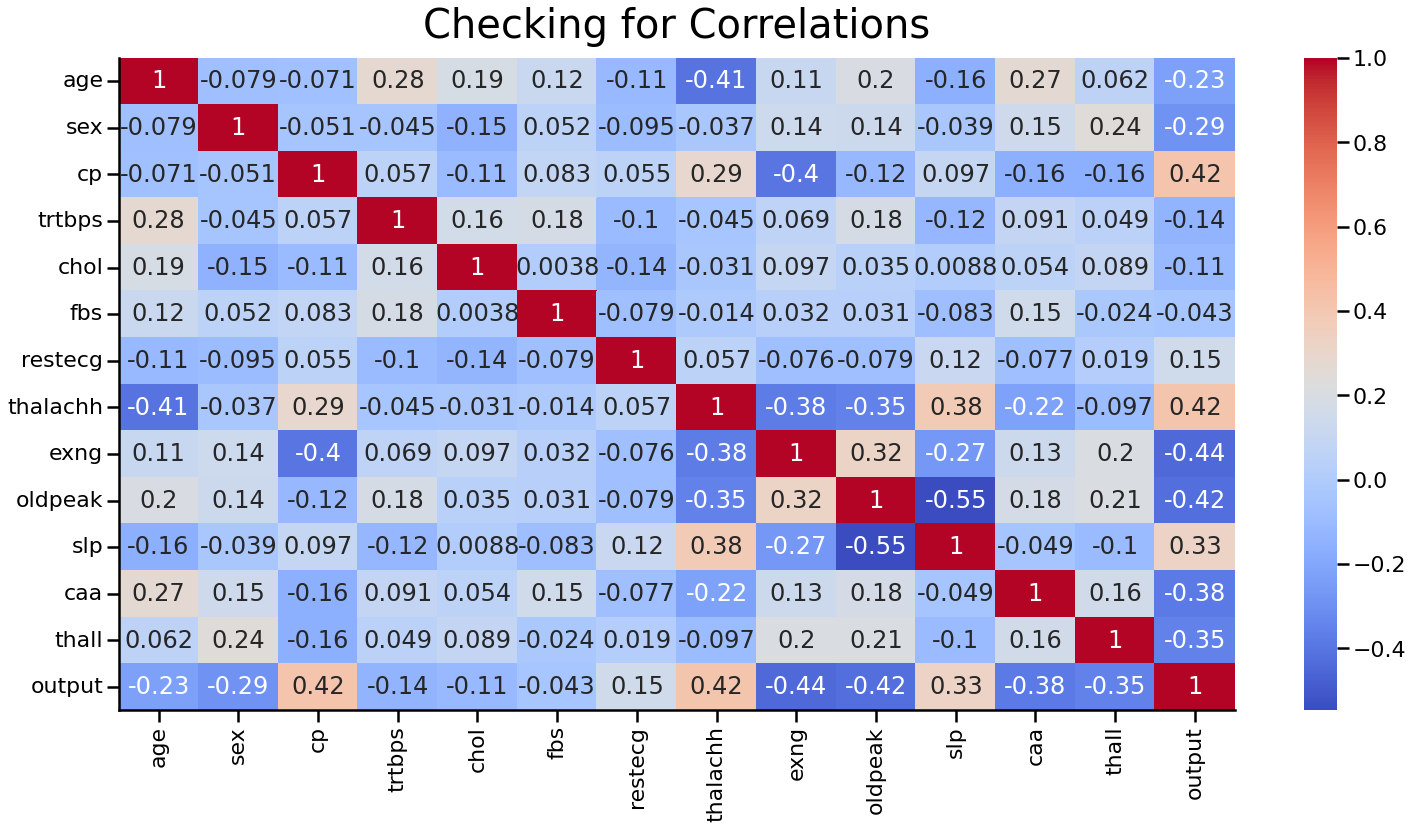

In [ ]:
# Create a heatmap

plt.figure(figsize=[25,12])
heat = df.corr()
sns.heatmap(heat, cmap='coolwarm', annot=True)
plt.title("Checking for Correlations", size=40, pad=20)
sns.despine()
plt.show()

# Modeling

In [ ]:
# Seperating the target(y) and the independent(X)

y = df['output']
X = df.drop(columns=['output'])

In [ ]:
# Performing train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [ ]:
# Verifying the split

X_train.shape, y_train.shape

((207, 13), (207,))

In [ ]:
# Build a random Decision Tree as our first model. Define a max_depth of 3

dt = DecisionTreeClassifier(max_depth = 3)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

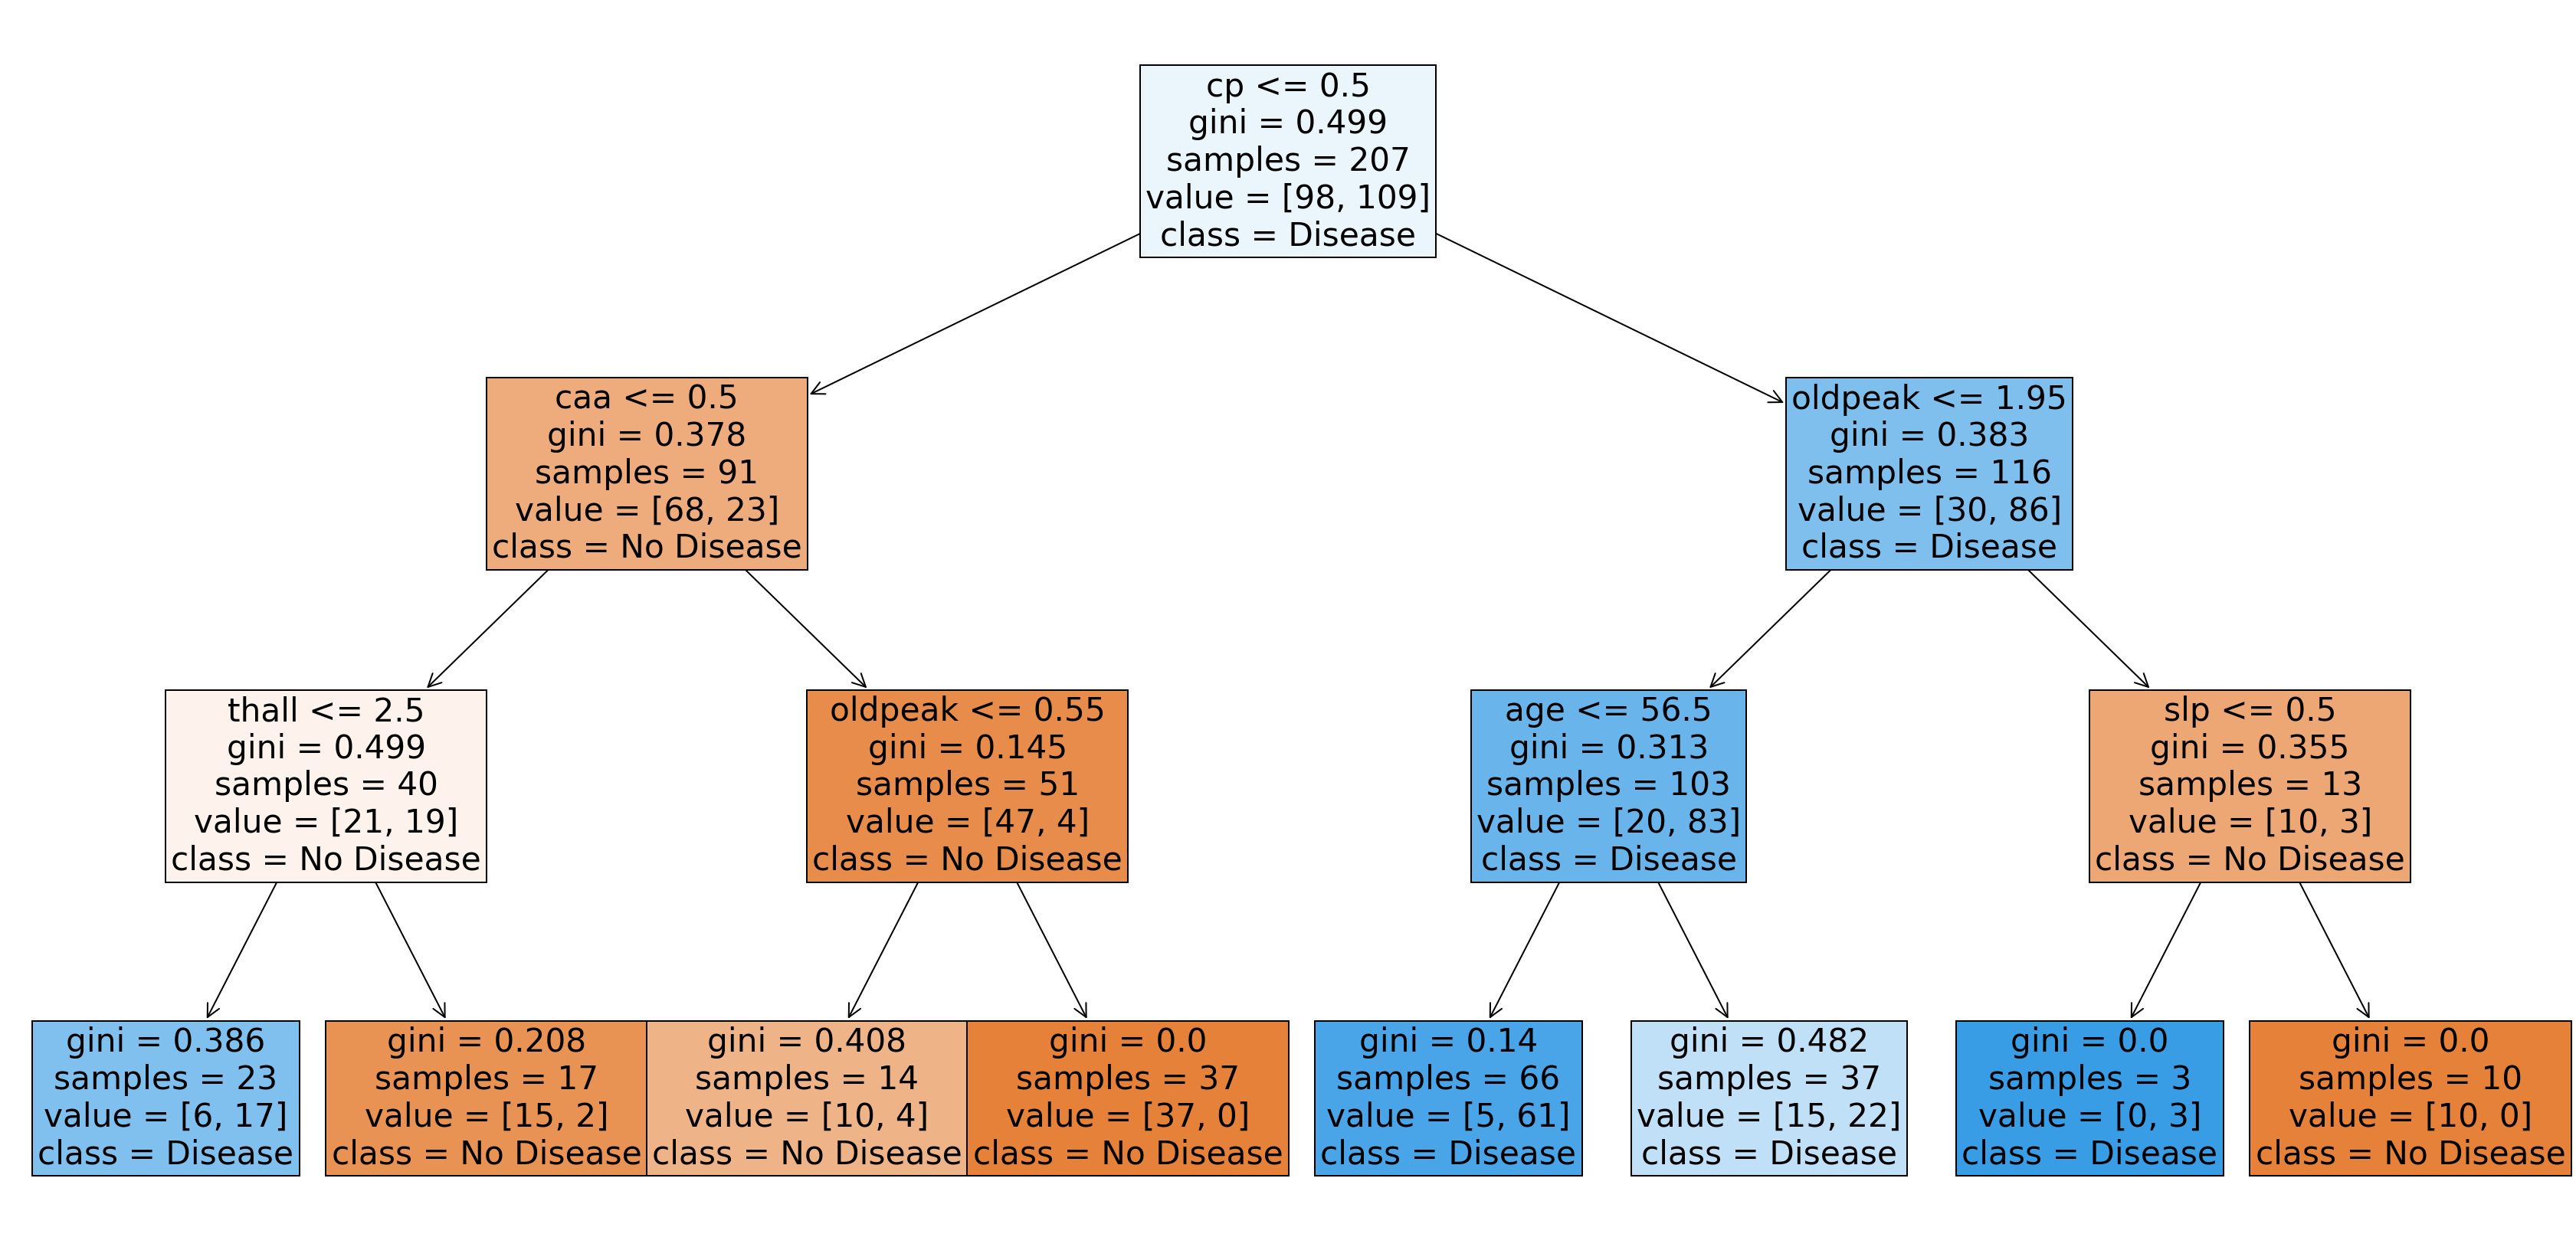

In [ ]:
# Visualizing Decision Tree

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns, class_names=['No Disease', "Disease"], filled=True);

# Evaluation

In [ ]:
# Finding the y_train_pred and the y_test_pred 

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

Confusion Matrix for training set:

[[ 72  26]
 [  6 103]]
********************


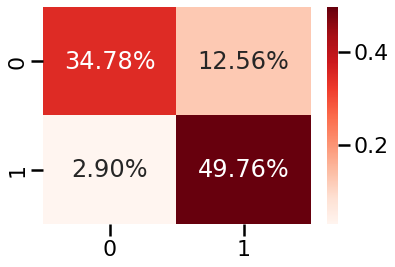

In [ ]:
# Evaluating the model: (Confusion Matrix) 

print("Confusion Matrix for training set:\n")
print(confusion_matrix(y_train, y_train_pred))
print('*'*20)
cm2 = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

Confusion Matrix for test set:

[[28  7]
 [ 6 48]]
********************


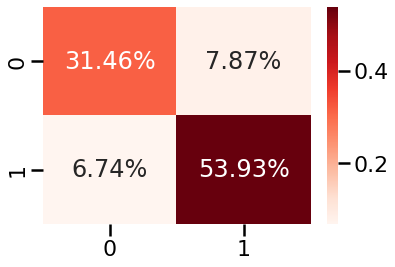

In [ ]:
# Evaluating the model: (Confusion Matrix) 

print("Confusion Matrix for test set:\n")
print(confusion_matrix(y_test, y_test_pred))
print('*'*20)
cm2 = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# Evaluating the model: (Accuracy) 

print("Accuracy on the training set: " + str(accuracy_score(y_train, y_train_pred)))
print('*'*20)
print("Accuracy on the test set: " + str(accuracy_score(y_test, y_test_pred)))

Accuracy on the training set: 0.8454106280193237
********************
Accuracy on the test set: 0.8539325842696629


In [ ]:
# Evaluating the model: (Precision)

print("Precision on the training set: " + str(precision_score(y_train, y_train_pred)))
print('*'*20)
print("Precision on the test set: " + str(precision_score(y_test, y_test_pred)))

Precision on the training set: 0.7984496124031008
********************
Precision on the test set: 0.8727272727272727


In [ ]:
# Evaluating the model: (Recall) 

print("Recall on the training set: " + str(recall_score(y_train, y_train_pred)))
print('*'*20)
print("Recall on the test set: " + str(recall_score(y_test, y_test_pred)))

Recall on the training set: 0.944954128440367
********************
Recall on the test set: 0.8888888888888888
